In [1]:
using Plots
using LaTeXStrings

In [3]:
using Pkg
Pkg.add("Plots")

    Updating registry at `C:\Users\Joshua Abraham\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Joshua Abraham\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Joshua Abraham\.julia\environments\v1.8\Manifest.toml`


# Algoritmos computacionales: `Proyecto Final`
## Alumnos: Victoriano Valle Esteban Daniel, Fuentes Máximo Joshua Abraham


# Modelo de Hodgkin-Huxley
El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

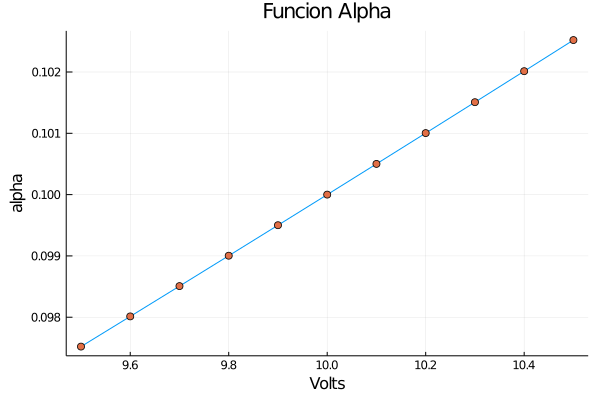

In [4]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado

using Plots

function alpha_n(V) ## Definimos la funcion 
ϵ =    0.000000000000001
    alpha_n= (0.01 *(10  - V)) /(exp((10 .-V)/10).-1)  ##Como la expresion mostrada arriba

    if abs(V-10)< ϵ
        return 0.1
    else
        return  alpha_n
        
   
          
end

end



plot((alpha_n, 9.5:0.1:10.5), xlabel="Volts", ylabel="alpha", title="Funcion Alpha", legend=false)  ##Ploteamos a funcion 
scatter!((alpha_n, 9.5:0.1:10.5))

##Hacemos un scatter para observar cada punto de la grafica

In [5]:
function beta_n(V)
   beta_n=0.125 *(exp(-V/80))
    return beta_n
end

beta_n (generic function with 1 method)

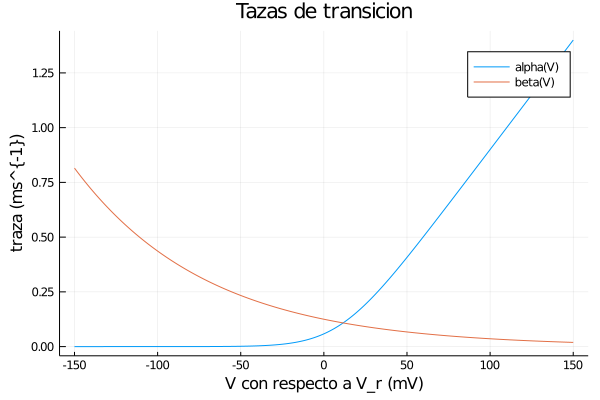

In [6]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n

using Plots


function plotAlpha()
    V = -150:150
    alpha = alpha_n.(V)
    beta = beta_n.(V)
    plot(
        V,
        alpha,
        title="Tazas de transicion",
        xlabel="V con respecto a V_r (mV)",
        ylabel="traza (ms^{-1})",
        label="alpha(V)"
    )
    plot!(V, beta, label="beta(V)")
    
end


plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

In [7]:
ϵ2 = 0.000000000000001
function alpha_m(V)
    alpha_m = (0.1 * (25 - V)) / (exp((25 - V)/(10)) .- 1)
    if abs(V-25) < ϵ2
        return 1
    else 
        return alpha_m 
end
end


function beta_m(V)
    beta_m = 4 * exp((-V)/(18))
end


function alpha_h(V)
    alpha_h = 0.07 * exp((-V)/(20))
end


function beta_h(V)
    beta_h = (1) / (exp((30 - V)/(10)).+1)
end


function tau_inf(alpha, beta,V)
    tau_inf = (1) / (alpha(V) .+ beta(V))
end


function n_inf(alpha, beta,V)
    n_inf = (alpha(V)) / (alpha(V) .+ beta(V))
end

n_inf (generic function with 1 method)

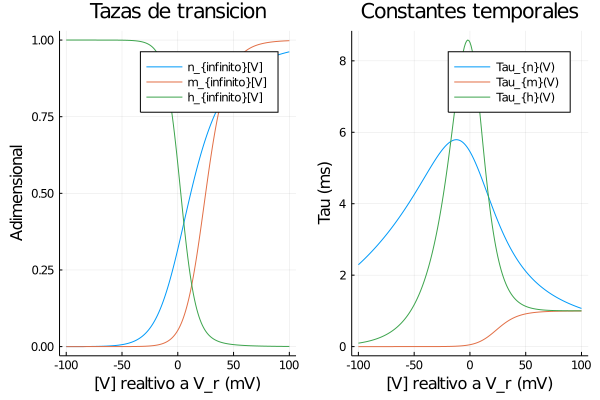

In [8]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar


function plotParameters()
   
    V = -100:100
    
    n_inf_n = n_inf.(alpha_n, beta_n,V)
    tau_inf_n = tau_inf.(alpha_n, beta_n,V)
    
    n_inf_m = n_inf.(alpha_m, beta_m,V)
    tau_inf_m = tau_inf.(alpha_m, beta_m,V)
    
    n_inf_h = n_inf.(alpha_h, beta_h,V)
    tau_inf_h = tau_inf.(alpha_h, beta_h,V)
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        label=["n_{infinito}[V]" "m_{infinito}[V]" "h_{infinito}[V]"]
    )
    
    p2 = plot(
        V,
        [tau_inf_n, n_inf_m, tau_inf_h],
        label=["Tau_{n}(V)" "Tau_{m}(V)" "Tau_{h}(V)"]
    )
    
    plot(
        p1,
        p2,
        layout=(1, 2),
        title=["Tazas de transicion" "Constantes temporales"],
        xlabel=["[V] realtivo a V_r (mV)" "[V] realtivo a V_r (mV)"],
        ylabel=["Adimensional" "Tau (ms)"],
        legend=true
    )
end


plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [9]:
# NOTA
# Los diccionarios son objectos que almacenan datos de la forma llave-valor (key-value)
# muy útiles para trabajar con información que tiene que ser etiquetada. Puedes encontrar más
# información sobre como trabajar con ellos en la documentación oficial de Julia:
# https://docs.julialang.org/en/v1/base/collections/#Dictionaries

parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)

function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.
        """
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
    return Iext
    end
end

makeIext (generic function with 4 methods)

In [10]:

    DeltaT = parametros["DeltaT"]
    maxT = parametros["maxT"]
    V0 = parametros["V0"]
    gNa = parametros["gNa"]
    gK = parametros["gK"]
    gL = parametros["gL"]
    Cm = parametros["Cm"]
    ENa = parametros["ENa"]
    EK = parametros["EK"]
    EL = parametros["EL"]


10.613

In [16]:
# Implementa aquí el resultado del algoritmo de intregración numérica de Euler para calcular V(t).
# Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?
# Inserta al final una celda con tus comentarios y resultados

function EulerHodkinHuxley(parametros)
    """Devuelve la solucion a las ecuaciones diferenciales del modelo de Hodgkin
    y Huxley utilizando el metodo de Euler
    """
     DeltaT = parameters["DeltaT"]
    maxT = parameters["maxT"]
    V0 = parameters["V0"]
    gNa = parameters["gNa"]
    gK = parameters["gK"]
    gL = parameters["gL"]
    Cm = parameters["Cm"]
    ENa = parameters["ENa"]
    EK = parameters["EK"]
    THE = parameters["THE"]
    Iext = makeIext()
    
    #Inicializamos las variables

    numSteps = Int(maxT / deltaT)
    T = zeros(numSteps)
    V = zeros(numSteps)
    n = zeros(numSteps)
    m = zeros(numSteps)
    h = zeros(numSteps)
    GK = zeros(numSteps)
    GNa = zeros(numSteps)
    tauN = zeros(numSteps)
    tauM = zeros(numSteps)
    tauH = zeros(numSteps)

    # Condiciones iniciales
    T[1] = 0.0
    V[1] = V0
    n[1] = 0.3177
    m[1] = 0.0529
    h[1] = 0.5961
    
    #Calculamos las soluciones para V[i], n[i], m[i],h[i]

    for i in 2:numSteps
        t = T[i-1]
        V[i] = V[i-1] - (deltaT / Cm) * (
                gNa * m[i-1]^3 * h[i-1] * (V[i-1] - ENa) +
                gK * n[i-1]^4 * (V[i-1] - EK) +
                gL * (V[i-1] - THE) +
                Iext(t)
            )

        n[i] = n[i-1] + deltaT * (
                (1 - deltaT / tauN[i-1]) * n[i-1] +
                deltaT / tauN[i-1] * nInf(V[i-1])
            )

        m[i] = m[i-1] + deltaT * (
                (1 - deltaT / tauM[i-1]) * m[i-1] +
                deltaT / tauM[i-1] * mInf(V[i-1])
            )

        h[i] = h[i-1] + deltaT * (
                (1 - deltaT / tauH[i-1]) * h[i-1] +
                deltaT / tauH[i-1] * hInf(V[i-1])
            )

        GK[i] = gK * n[i]^4
        GNa[i] = gNa * m[i]^3 * h[i]
        tauN[i] = tauN(V[i-1])
        tauM[i] = tauM(V[i-1])
        tauH[i] = tauH(V[i-1])

        T[i] = t + deltaT
    end

    result = Dict(
        "T" => T,
        "V" => V,
        "n" => n,
        "m" => m,
        "h" => h,
        "GK" => GK,
        "GNa" => GNa,
        "tauN" => tauN,
        "tauM" => tauM,
        "tauH" => tauH
    )

    return result
end
  

function plotSimulation(resultado)
    tiempo = resultado["T"]
    
    p1 = plot(tiempo, resultado["V"])
    p2 = plot(tiempo, [resultado["GK"], resultado["GNa"]], label=[L"G_{K}" L"G_{Na}"])
    p3 = plot(tiempo, [resultado["n"], resultado["m"], resultado["h"]], label=[L"n" L"m" L"h"])
    p4 = plot(tiempo, [resultado["tauN"], resultado["tauM"], resultado["tauH"]], label=[L"\tau_n" L"\tau_m" L"\tau_h"])

    plot(
        p1,
        p2,
        p3,
        p4,
        layout=(2, 2),
        title=["Voltaje en la membrana" "Conductancia de los canales" "Tazas de transición" "Constantes temporales"],
        xlabel="t (ms)",
        ylabel=["Voltaje relativo en la membrana (mV)" L"Conductancia (mS/cm^2)" "adimensional" L"\tau (ms)"],
        legend=true
    )
end
    

function simulaHodkinHuxley(V0, t0, tfin, current)
    iext_func = makeIext(t0, tfin, current)
    parametros["V0"] = V0
    resultado = EulerHodkinHuxley(parametros)
    plotSimulation(resultado)
end


V0 = 0
t0 = 10
tfin = 16 # seleccionar de: -90 a 120
current = 2.4 # seleccionar de: -10 a 10

simulaHodkinHuxley(V0, t0, tfin, current)

#A pesar que este código no logró graficar las gráficas de "voltaje de la membrana", "conductancia de los canales", 
#"tazas de transición" y "constantes temporales", la idea del código anterior se fundamenta en el modelo de e Hodgkin-Huxley,
#y en su algoritmo para representarlo, el algoritmo que se siguió fue el siguiente:
#1. Se inicializaron los parámetros, así como las condiciones iniciales para las variables dinámicas
#2. Se tomaron los pulsos de t en 10->30 
#3. Se calcularon las corrientes de estímulo de -10 a 10 uA
#4. En el ejercicio anterior se definieron las constantes de velocidad como α_n, β_n, α_n, β_m,  α_h y β_h usando V_m(t)
#5. Se calcularon los tres valores de τx y x∞
#6. Se calcularon las tres probabilidades de puerta o canal, es decir, n[i], m[i] y h[i]
#7. Se calcularon los nuevos valores para GNa y GK
#8. Se calcularon los nuevos valores para τNa y τK 
#9. Se calcularon Vm(t + ∆t) según la ecuación diferencial para el voltaje
#10. Finalmente se esperaba obtner las cuatro gráficas: "voltaje de la membrana", "conductancia de los canales", 
#"tazas de transición" y "constantes temporales".

LoadError: LoadError: UndefVarError: @L_str not defined
in expression starting at In[16]:100

# Comentarios y resultados
Nota:Estos resultados y comentarios nacen a partir de observar las imágenes que fueron proporcioadas en el proyecto final y de las cuales, se está haciendo un análisis.

## Comentarios
El efecto del estímulo sobre el potencial de membrana es claramente visible en el gráfico de voltaje de membrana. El estímulo tuvo suficiente amplitud y duración para desencadenar un aumento autogenerado en la conductancia del canal de sodio debido al 
mecanismo de retroalimentación positiva de la corriente de irrupción de sodio dependiente de voltaje. Esto se pude apreciar en la gráfica de `conductancia de canales`, en el flaco ascendente empinado de `GNa(t)` se denomina fase de despolarización de la dinámica del potencial de acción.
El efecto de la puerta de inactivación de sodio comienza a manifestarse en la respuesta del canal de sodio. 
El canal de Na+ se inactiva, la acumulación de Vm se detiene. Al mismo tiempo, el aumento de la conductancia de potasio GK y su salida asociada de iones de K+ comienza el proceso de repolarización de la célula. Como los canales de Na+ están inactivos la corriente de K+ devuelve Vm al nivel de reposo e incluso hace que no alcance este valor. Este subimpulso se denomina hiperpolarización del potencial de membrana.

Por otro lado, un estímulo de menor amplitud o de menor duración habría producido una respuesta en el potencial de membrana, pero el cambio en Vm no habría sido suficiente para inducir la activación autogenerada de las puertas de sodio. Sin esta 
acción auto generadora, no hay potencial de acción. Esto se denomina efecto de umbral, y el valor crítico de Vm asociado con el efecto se llama el umbral. Para una constante de timpo menor para el K+ y relativa a los canales de Na+, evidente a partir de los cursos de tiempo de las dos conductancias. Por ejemplo, si consideramos la gráfica de `constantes temporales` la constante de tiempo para h va a ser incluso más lenta que la de la puerta de activación de potasio de la variable n durante la fase de 
repolarización. Esto significa que la desactivación de la puerta h procede más  lentamente que la recuperación (desactivación) de la puerta n.

Finalmente, durante este tiempo, cuando una gran fracción de las puertas de inactivación de sodio están cerradas, un  estímulo adicional no puede lograr evocar más corriente de Na+.  A medida que pasa más tiempo y se abren más puertas h, es posible volver a estimular otro potencial de acción, pero el umbral  requerido para hacerlo se incrementa por encima del nivel de reposo normal. Este fenómeno es llamado período refractario de la célula. Se divide en dos fases. El período durante el cual no puede ser restimulado potencial de mebrana se llama el período refractario absoluto. La fase durante la cual es posible volver a estimular un potencial de membrana (pero a un nivel de umbral más alto) se denomina periodo refractario relativo.

## Resultados
Mientras más aumente la corriente inyectada, aumenta la despolarización de la membrana, lo que provoca que alcance valores de voltaje positivo, y con esta despolarización se activan los canales de Sodio y Potasio. 
En base en las gráficas, es posible ver como el modelo de Hudgkin y Huxley describe de forma precisa tanto la propagación del potencial de acción, como el umbral y periodo refractario. Del mismo modo, permite predecir el comportamiento de las concentraciones de los iones Sodio (Na+) y Potasio (K+), al interior y exterior de la membrana, con las tasas de transición. 

## Referencia
Häusser M. (2000) The Hudgkin-Huxley theory of the action potential. Nature. Chapter (3).